In [51]:
from book.mat import Mat
from book.vec import Vec
from book.vecutil import list2vec
from book.matutil import *

import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


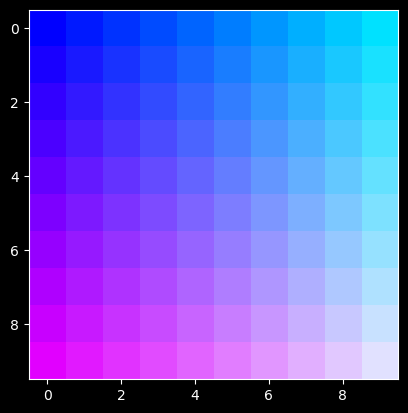

In [52]:
img_arr = np.ones((10, 10, 3), dtype=int)

for index in np.ndindex(img_arr.shape[:2]):
    img_arr[index] = np.append(index, 100) * 25

# Display the image using Matplotlib
plt.imshow(img_arr)
plt.show()

In [63]:
# homogeneous coordinates, (x, y, u) 
# "texel" (short for texture element) 
# Define generalized image, each pixel is a quadrilateral
# A generalized pixel would be defined by its corners, which are called pixel coordinates
# The mapping of corners to points in the plane is given by location matrix
# The mapping of pixels to color, is using the top-left pixel coordinate

# from PIL import Image
# webp_image = Image.open('model.jpeg')
# png_image = webp_image.convert('RGBA')
# png_image.save('model.png', format='PNG')

from book.image_mat_util import *
zebra_img = file2mat("zebra.png")
model_img = file2mat("model.png")

In [56]:
mat2display(*zebra_img)

Hit Enter once the image is displayed.... 

In [131]:
import random

# Task 4.15.2
def identity():
    D = {'x', 'y', 'u'}
    return Mat((D, D), {(r, c): 1 for r in D for c in D if r == c})

I = identity()

def apply_loc(img_loc_m, transform, rand=False):
    loc_cols = mat2coldict(img_loc_m)
    for k in loc_cols:
        if rand:
            if random.uniform(0, 1) > 0.5:
                loc_cols[k] = transform * loc_cols[k]
        else:
            loc_cols[k] = transform * loc_cols[k]
        
    return coldict2mat(loc_cols)

# mat2display(apply_loc(model_img[0], I, rand=True), model_img[1])

In [151]:
# 4.15.6 Translation
# 2D: [[1+alpha, 0], [0, 1+beta]]
# 3D: [[1+alpha, 0, 0], [0, 1+beta, 0], [0, 0, 1]]
def translate(alpha, beta):
    D = {'x', 'y', 'u'}
    return I + Mat((D, D), {
        ('x', 'u'): alpha,
        ('y', 'u'): beta,
        })

T = translate(0, 100)
# mat2display(apply_loc(zebra_img[0], T), zebra_img[1])

Hit Enter once the image is displayed.... 

In [135]:
# 4.15.7 Scaling
def scale(x, y):
    D = {'x', 'y', 'u'}
    return Mat((D, D), {
        ('x', 'x'): x,
        ('y', 'y'): y,
        ('u', 'u'): 1})

S = scale(4, 0.5)
# mat2display(apply_loc(model_img[0], S), model_img[1])

Hit Enter once the image is displayed.... 

In [140]:
# 4.15.8 Rotation
# [[cos, -sin, 0], [sin, cos, 0], [0, 0, 1]]
def rotate(theta):
    D = {'x', 'y', 'u'}
    return Mat((D, D), {
        ('x', 'x'): math.cos(theta),
        ('x', 'y'): -math.sin(theta),
        ('x', 'u'): 0,
        ('y', 'y'): math.cos(theta),
        ('y', 'x'): math.sin(theta),
        ('y', 'u'): 0,
        ('u', 'u'): 1,
        ('u', 'x'): 1,
        ('u', 'y'): 1 })

R = rotate(-math.pi/6)
mat2display(apply_loc(zebra_img[0], R), zebra_img[1])

Hit Enter once the image is displayed.... 

In [152]:
# 4.15.9 Rotation about a center other than the origin
def rotate_about(theta, x, y):
    return rotate(theta) * translate(x, y)

RC = rotate_about(-math.pi/6, 0, 100)
mat2display(apply_loc(zebra_img[0], RC), zebra_img[1])

Hit Enter once the image is displayed.... 

In [160]:
# 4.15.10 Reflection
def reflect_x():
    D = {'x', 'y', 'u'}
    return Mat((D, D), {
        ('x', 'x'): -1,
        ('y', 'y'): 1,
        ('u', 'u'): 1})

def reflect_y():
    D = {'x', 'y', 'u'}
    return Mat((D, D), {
        ('x', 'x'): 1,
        ('y', 'y'): -1,
        ('u', 'u'): 1})

# mat2display(apply_loc(zebra_img[0], translate(200, 0)*reflect_x()), zebra_img[1])
# mat2display(apply_loc(zebra_img[0], translate(0, 200)*reflect_y()), zebra_img[1])

In [172]:
# 4.15.11 Color transformations
def scale_color(r, g, b):
    D = {'r', 'g', 'b'}
    return Mat((D, D), {
        ('r', 'r'): r,
        ('g', 'g'): g,
        ('b', 'b'): b})

CS = scale_color(5.0, 1.0, 1.0)
mat2display(zebra_img[0], apply_loc(zebra_img[1], CS))

Hit Enter once the image is displayed.... 

In [186]:
# Task 4.15.10:
def grayscale(): 
    D = {'r', 'g', 'b'}
    v = Vec(D, {'r': 77.0/256, 'g': 151.0/256, 'b': 28.0/256})
    return rowdict2mat({ 'r': v, 'g': v, 'b': v, })

# grayscale()
mat2display(model_img[0], apply_loc(model_img[1], grayscale()))

Hit Enter once the image is displayed.... 

In [ ]:
# Task 4.15.12 Reflection more generally
# ???